# **Machine Learning Model (Classification/logisitic)**

## **Load data set**


In [9]:
import pandas as pd
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## **Data Preparation**

**Separate data as y and x**

In [11]:
y = df['Diabetes_012']
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, Length: 253680, dtype: float64

In [12]:
x = df.drop('Diabetes_012', axis = 1)
x

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## **Data Splitting**

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [14]:
x_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
36088,1.0,0.0,1.0,24.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
111682,1.0,1.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,10.0,2.0,0.0,0.0,9.0,6.0,8.0
77112,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,6.0,7.0
69393,0.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,30.0,0.0,0.0,0.0,5.0,5.0,6.0
216704,1.0,1.0,1.0,33.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,3.0,1.0,1.0,10.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
77655,0.0,0.0,1.0,35.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
210755,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,5.0,6.0,8.0
56088,0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,6.0,8.0


In [15]:
x_test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
26001,1.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,8.0,6.0,5.0
177967,1.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,3.0,0.0,2.0,0.0,1.0,2.0,6.0,4.0
206835,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0
223078,1.0,1.0,1.0,24.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
102735,0.0,0.0,1.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,5.0,25.0,0.0,0.0,9.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203488,1.0,1.0,1.0,26.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,20.0,1.0,1.0,9.0,6.0,8.0
199643,0.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,5.0,7.0
59818,1.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,2.0,0.0,0.0,11.0,6.0,7.0
164795,0.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,2.0,0.0,0.0,0.0,4.0,4.0,8.0


## **Model Building**

## **Gradient Boosting**

In [40]:
from sklearn.metrics import(
    accuracy_score,
    classification_report,
    confusion_matrix,
)
import seaborn as sns
import matplotlib.pyplot as plt

gb = GradientBoostingClassifier(random_state=100)
gb.fit(x_train, y_train)


,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

## **Applying the model**

In [41]:
y_gb_train_pred = gb.predict(x_train)
y_gb_test_pred = gb.predict(x_test)

## **Evualate Model Performance**

In [43]:
print("Train Accuracy:", accuracy_score(y_train, y_gb_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_gb_test_pred))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_gb_test_pred, target_names=["No Diabetes", "Prediabetes", "Diabetes"]))

Train Accuracy: 0.850382371491643
Test Accuracy: 0.8493771680857773

Classification Report (Test):
              precision    recall  f1-score   support

 No Diabetes       0.86      0.98      0.92     42669
 Prediabetes       0.00      0.00      0.00       907
    Diabetes       0.57      0.20      0.30      7160

    accuracy                           0.85     50736
   macro avg       0.48      0.39      0.40     50736
weighted avg       0.81      0.85      0.81     50736



C:\Users\jonnypc\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jonnypc\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jonnypc\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

In [44]:
import numpy as np

print("unique predictions: ", np.unique(y_gb_test_pred))
print("True labels: ", np.unique(y_test))

unique predictions:  [0. 2.]
True labels:  [0. 1. 2.]


## **Visualization Confusion Matrix**

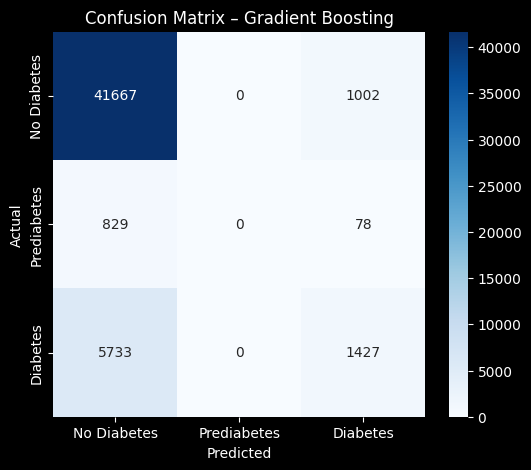

In [46]:
cm = confusion_matrix(y_test, y_gb_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Diabetes", "Prediabetes", "Diabetes"],
    yticklabels=["No Diabetes", "Prediabetes", "Diabetes"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Gradient Boosting")
plt.show()


## **Features Importance**

In [47]:
import pandas as pd
importance = pd.Series(
    gb.feature_importances_,
    index=x.columns
).sort_values(ascending=False)
print(importance.head(10))

GenHlth                 0.302167
HighBP                  0.266174
BMI                     0.166722
Age                     0.082926
HighChol                0.077115
DiffWalk                0.028457
HeartDiseaseorAttack    0.025217
Income                  0.014434
HvyAlcoholConsump       0.009327
Sex                     0.007050
dtype: float64


## **Random forest classifier**

In [50]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Random Forest (3-class) ---
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,          # let it grow; we'll control with min_* params
    min_samples_leaf=10,     # helps generalization + avoids overfitting
    min_samples_split=20,
    class_weight="balanced", # IMPORTANT: helps class 1 not disappear
    random_state=100,
    n_jobs=-1
)

rf.fit(x_train, y_train)

rf_pred_train = rf.predict(x_train)
rf_pred_test  = rf.predict(x_test)

print("RF Unique predictions:", np.unique(rf_pred_test))
print("RF Train Accuracy:", accuracy_score(y_train, rf_pred_train))
print("RF Test  Accuracy:", accuracy_score(y_test, rf_pred_test))

print("\nRF Classification Report (Test):")
print(classification_report(
    y_test,
    rf_pred_test,
    target_names=["No Diabetes", "Prediabetes", "Diabetes"],
    zero_division=0
))

print("\nRF Confusion Matrix (Test):")
print(confusion_matrix(y_test, rf_pred_test))


RF Unique predictions: [0. 1. 2.]
RF Train Accuracy: 0.7810479738252917
RF Test  Accuracy: 0.7384500157678966

RF Classification Report (Test):
              precision    recall  f1-score   support

 No Diabetes       0.94      0.75      0.84     42669
 Prediabetes       0.04      0.02      0.02       907
    Diabetes       0.33      0.74      0.46      7160

    accuracy                           0.74     50736
   macro avg       0.44      0.50      0.44     50736
weighted avg       0.84      0.74      0.77     50736


RF Confusion Matrix (Test):
[[32150   356 10163]
 [  380    17   510]
 [ 1772    89  5299]]


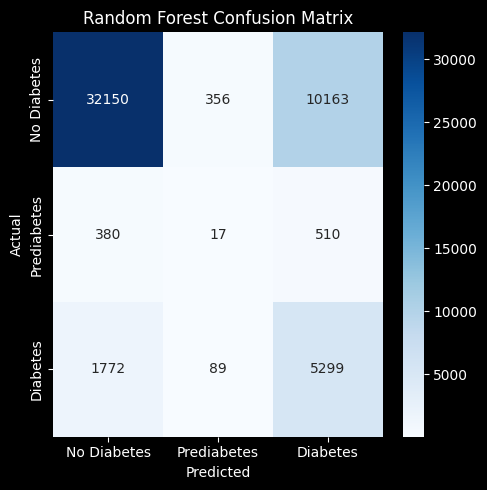

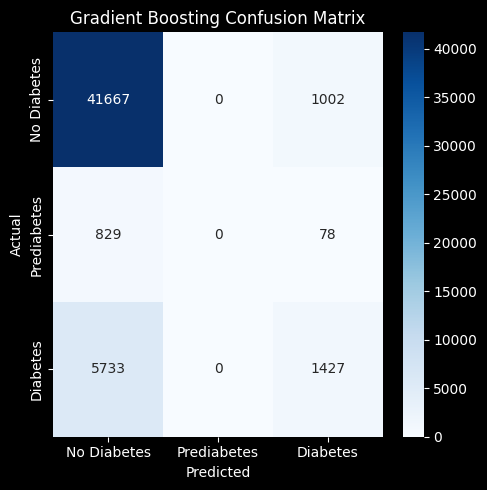

In [55]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_cm(y_test, rf_pred_test, "Random Forest Confusion Matrix")
plot_cm(y_test, y_gb_test_pred, "Gradient Boosting Confusion Matrix")


“Gradient Boosting optimized overall accuracy by collapsing the prediabetes class into adjacent categories, resulting in zero predictions for that class. In contrast, the Random Forest classifier was able to identify prediabetes cases, albeit with low recall, reflecting the overlapping nature of metabolic risk factors across diabetes stages.”